In [3]:
# Import the ProfileReport class from the ydata_profiling library
!pip install ydata-profiling
from ydata_profiling import ProfileReport

# Create a comprehensive profile report for the DataFrame 'df'
df = pd.read_csv('/kaggle/input/co2-emissions/dataset.csv')
# This report will contain various statistics, insights, and visualizations about the data
profile = ProfileReport(data, title='Data Profile Report')

profile.to_notebook_iframe() # use this line to show the output

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/co2-emissions/dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [7]:
# performing one-hot encoding for both the "country" and "sector" variables
from sklearn.preprocessing import OneHotEncoder

# Selecting the columns for one-hot encoding
columns_to_encode = ['country', 'sector']

# Creating the OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)

# Perform one-hot encoding
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Creating a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenating the encoded data with the original dataframe
df_encoded = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

# Display the first few rows of the transformed dataframe
df_encoded.head()



,date,value,timestamp,country_Brazil,country_China,country_EU27 & UK,country_France,country_Germany,country_India,country_Italy,...,country_Spain,country_UK,country_US,country_WORLD,sector_Domestic Aviation,sector_Ground Transport,sector_Industry,sector_International Aviation,sector_Power,sector_Residential
0,01/01/2019,0.096799,1546300800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,01/01/2019,14.816100,1546300800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,01/01/2019,1.886490,1546300800,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,01/01/2019,0.051217,1546300800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,01/01/2019,0.315002,1546300800,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Convert the 'date' column to a datetime data type
df_encoded['date'] = pd.to_datetime(df_encoded['date'], format='%d/%m/%Y')

# Display the first few rows to confirm the change
df_encoded.head()

,date,value,timestamp,country_Brazil,country_China,country_EU27 & UK,country_France,country_Germany,country_India,country_Italy,...,country_Spain,country_UK,country_US,country_WORLD,sector_Domestic Aviation,sector_Ground Transport,sector_Industry,sector_International Aviation,sector_Power,sector_Residential
0,2019-01-01,0.096799,1546300800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2019-01-01,14.816100,1546300800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2019-01-01,1.886490,1546300800,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2019-01-01,0.051217,1546300800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2019-01-01,0.315002,1546300800,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
from sklearn.model_selection import train_test_split

# Convert 'timestamp' and 'date' columns to numeric values
df_encoded['timestamp'] = df_encoded['timestamp'].astype(float)
df_encoded['date'] = df_encoded['date'].astype('int64')

# Defining features and target variable
X = df_encoded.drop('value', axis=1)  # features
y = df_encoded['value']  # target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((108326, 22), (27082, 22), (108326,), (27082,))

Perfroming Ridge Regression Model

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model on the training set
ridge_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse



(14.104044700292324, 3.7555352082349494)

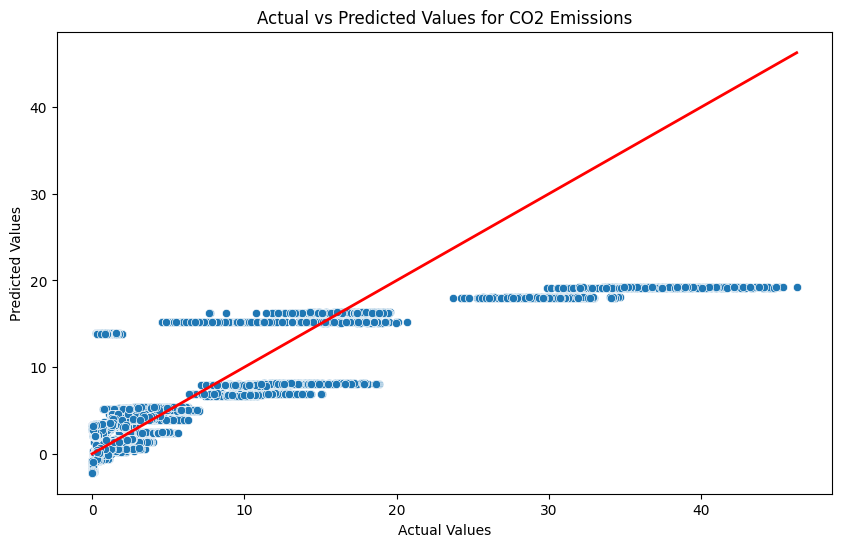

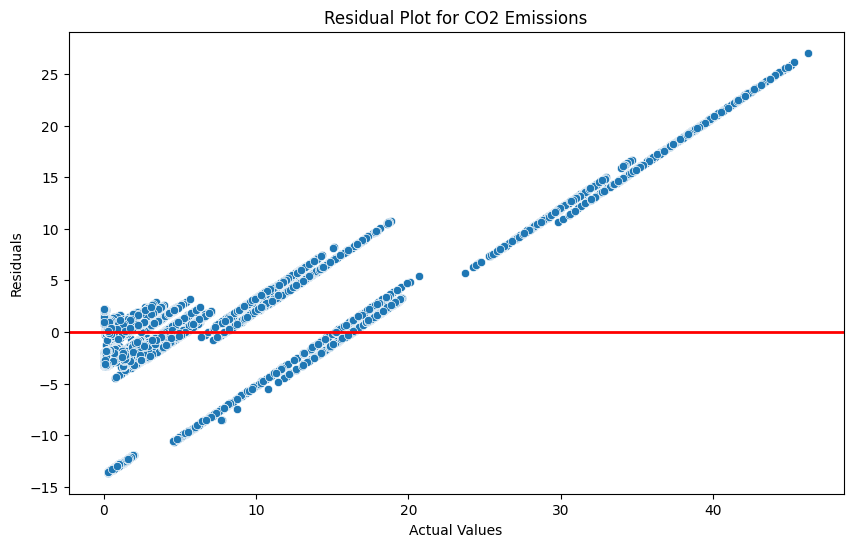

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for CO2 Emissions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect predictions
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for CO2 Emissions')
plt.axhline(y=0, color='red', lw=2)  # Line at 0 for reference
plt.show()

Here are two visualizations for the Ridge Regression model I applied:

Scatter Plot of Actual vs. Predicted Values: This plot shows the relationship between the actual CO2 emissions values (x-axis) and the predicted values by the model (y-axis).
The red line represents perfect predictions. The closer the points are to this line, the more accurate the model's predictions.
Residual Plot:

The Residual plot illustrates the residuals (differences between actual and predicted values) on the y-axis against the actual values on the x-axis.
The red line at 0 is a reference line. Ideally, residuals should be randomly scattered around this line, indicating that the model does not systematically overpredict or underpredict across the range of values.
These plots can help you assess the performance of the model and identify any patterns or biases in the predictions.

Trying Catboost rgeressor gave better results. 

In [12]:
from catboost import CatBoostRegressor

# Initialize the CatBoost Regressor model
catboost_model = CatBoostRegressor(verbose=0)  # 'verbose=0' to silence the training output

# Train the model on the training set
catboost_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_catboost = catboost_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for the CatBoost predictions
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)

mse_catboost, rmse_catboost


(0.13271693147732821, 0.36430335090049365)

RMSE is relatively low, it suggests that CatBoost model is performing well at predicting CO2 emissions based on the features provided. The range of CO2 emissions values in the 'value' column of the dataset is as follows:

Minimum CO2 emissions value: approximately 0.000078

Maximum CO2 emissions value: approximately 46.2635

This range indicates a wide variation in the CO2 emissions values captured in your dataset, spanning from near zero to over 46 units. Given this range, an RMSE of  0.3643 from the CatBoost model suggests that the model's predictions are, on average, deviating from the actual values by a relatively small amount compared to the overall range of the data. This indicates a good performance of your model in predicting CO2 emissions

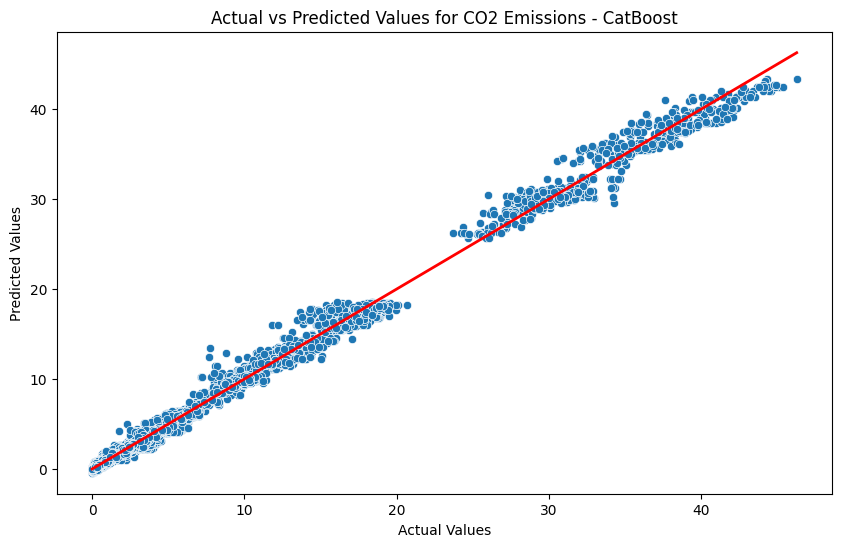

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_catboost)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for CO2 Emissions - CatBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect predictions
plt.show()

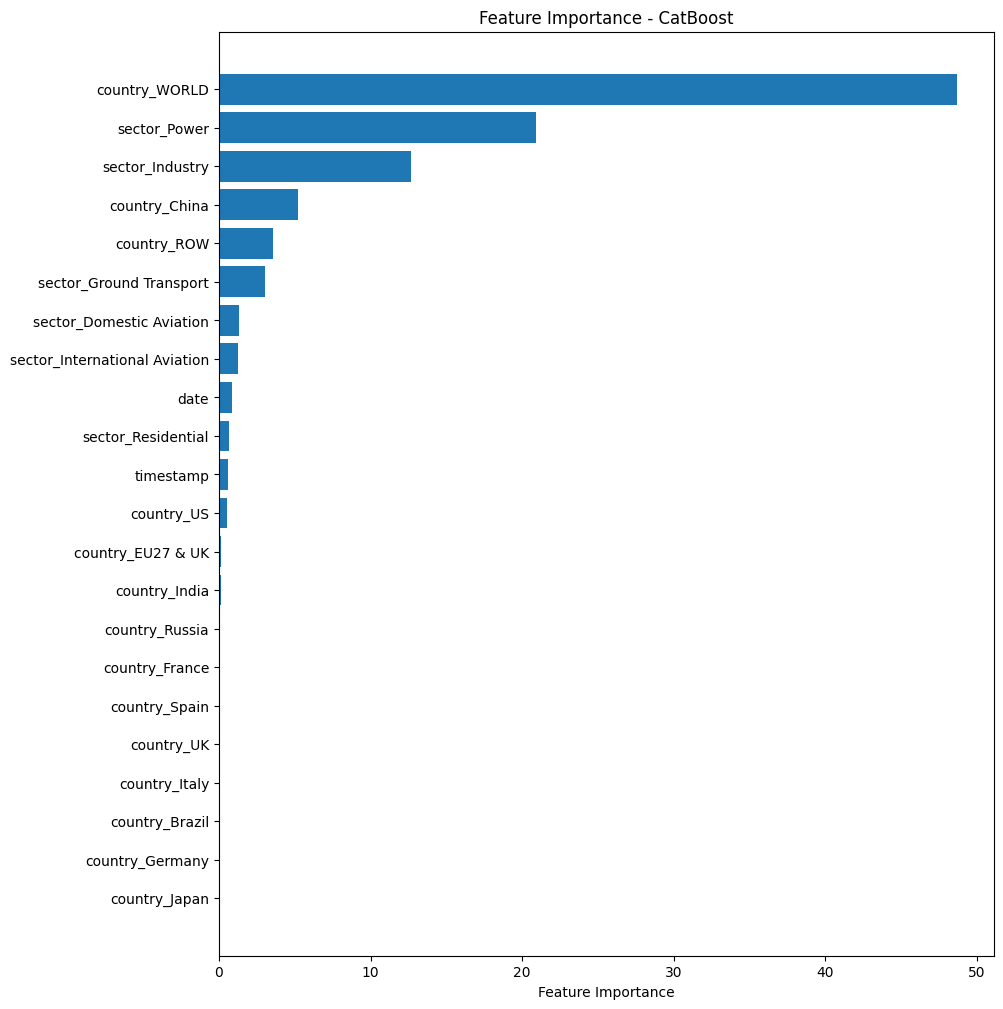

In [14]:
feature_importances = catboost_model.get_feature_importance()
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - CatBoost')
plt.show()
